# 第7章 内建的控制结构
Scala只有为数不多的几个内建的控制结构。这些控制结构包括：i f、while、for、try、match和函数调用。Scala的内建控制结构之所以这么少，归功于它从一开始就引入了函数字面量。不同于在基础语法中不断地添加高级控制结构这种做法，Scala将它们归口到类库当中（第9章将会展示具体做法）。本章主要介绍的就是这些内建的控制结构。

你会注意到一点，**那就是Scala所有的控制结构都返回某种值作为结果**。这是函数式编程语言采取的策略，程序被认为是用来计算出某个值，因此程序的各个组成部分也应该计算出某个值。你也可以将这种方式看作在指令式编程语言中已经存在的那种趋势的逻辑终局。在指令式编程语言中，函数调用可以返回某个值，即便被调用的函数在过程中更新了某个传入的输出变量，这套机制也是能正常运作的。除此之外，指令式编程语言通常都提供了三元操作符（比如C、C++和Java的？:），其行为跟i f几乎没差别，只是会返回某个值， Scala也采纳了这样的三元操作模型，不过把它称作i f。换句话说，Scala的if可以有返回值。Scala更进一步让for、try和match也都有返回值。

程序员可以用这些返回值来简化他们的代码，就像他们能用函数的返回值一样。缺少了这个机制，程序员必须创建临时的变量，这些变量仅仅是用来保持那些在控制结构内部计算出来的结果。去掉这些临时变量不仅让代码变得更简单，同时还避免了很多由于在某个分支设置了变量而在另一个分支中忘记设置带来的bug。

总体而言，Scala这些基础的控制结构虽然看上去很小，却提供了本质上跟指令式编程语言相同的功能。不仅如此，它们通过确保每段代码都有返回值让你的代码变得更短。为了向你展示这一点，我们将对Scala的每一个控制结构做详细的讲解。

## 7.1 if表达式
Scala的if跟很多其他语言一样，首先测试某个条件，然后根据条件是否满足来执行两个不同代码分支当中的一个。下面给出了一个以指令式风格编写的常见例子：

In [ ]:
val args = Array("7-ControlMethodInScala.ipynb")

var filename = "default.txt"
if(!args.isEmpty)
    filename = args(0)

这段代码定义了一个变量filename并初始化成默认值，然后用if表达式检查是否有入参传给这个程序。如果有，就用传入的入参改写变量的值。如果没有入参，则保留变量的默认值。

这段代码可以写得更精简，因为（我们在第2章的第3步有讲到）Scala的if是一个能返回值的表达式。示例7.1给出了不使用var达到跟前一例同样效果的做法：

In [ ]:
val filename =
    if(!args.isEmpty) args(0)
    else "default.txt"

这一次，if有两个分支。如果 args不为空，则选取第一个元素args（0）；否则，选取默认值。if表达式的返回值是被选取的值，这个值进而被用于初始化变量filename。这段代码比前面给出的稍微短了一些，但真正的优势在于它用的是val而不是var。使用val是函数式的风格，就像Java的final变量那样，有助于你编写出更好的代码。它也告诉读这段代码的人，这个变量一旦初始化就不会改变，省去了扫描该变量整个作用域的代码来搞清楚它会不会变的必要。

使用val而不是var的另一个好处是**对等式推理**（equational reasoning）的支持。引入的变量等于计算出它的值的表达式（假定这个表达式没有副作用）。因此，在任何你打算写变量名的地方，都可以直接用表达式来替换。比如，可以不用println（filename），而是写成这样：

In [ ]:
println(if(!args.isEmpty) args(0) else "default.txt")

这是你的选择，两种方式都行。使用val让你可以在代码演进过程中安全地执行这种重构。

只要有机会，尽可能使用val，它们会让你的代码更易读也更易于重构。

## 7.2 while循环

Scala的while循环跟其他语言用起来没多大差别。它包含了一个条件检查和一个循环体，只要条件检查为真，循环体就会一遍接着一遍地执行。来看示例7.2：

In [ ]:
def gcdLoop(x: Long, y:Long): Long = {
    var a = x
    var b = y
    while(a !=0 ){
        val temp = a
        a = b % a
        b = temp
    }
    b
}

gcdLoop(27,12)

Scala也有do-while循环，它跟while循环类似，只不过它是在循环体之后执行条件检查而不是在循环体之前。示例7.3给出了一段用do-while来复述从标准输入读取的文本行，直到读到空行为止的Scala脚本：

In [ ]:
var line = ""
do {
    line = readLine()
    println("Read: " + line)
} while (line != "")

while和do-while这样的语法结构，我们称之为“循环”而不是表达式，因为它们并不会返回一个有意义的值。返回值的类型是Unit。实际上存在这样一个（也是唯一的一个）类型为Unit的值，这个值叫作单元值（unit value），写作（）。存在这样一个（）值，是Scala的Unit跟Java的void的不同。可以尝试在解释器中键入：

In [ ]:
def greet() = {println("hi")}
() == greet()

由于greet的方法体之前没有等号，greet被定义为一个结果类型为Unit的过程。[1]这样一来，greet返回单元值（）。这一点在接下来的一行中得到了印证：对greet的结果和单元值（）判等，得到true。
另一个相关的返回单元值的语法结构是对var的赋值。例如，当你尝试在Scala中像Java（或C/C++）的while循环惯用法那样使用while循环时，会遇到问题：

In [ ]:
var line = ""
while ((line = readLine()) != "")//并不可行，这个循环永远结束不了
    println("Read: " + line)

这段代码在编译时，Scala编译器会给出一个警告：用！=对类型为U n i t的值和String做比较将永远返回true。在Java中，赋值语句的结果是被赋上的值（在本例中就是从标准输入读取的一行文本），**而在Scala中赋值语句的结果永远是单元值（）**。因此，赋值语句“line = readLine（）”将永远返回（），而不是＂＂。这样一来，w h i l e循环的条件检查永远都不会为false，循环将无法终止。

由于while循环没有返回值，纯函数式编程语言通常都不支持。这些语言有表达式，而不是循环。尽管如此，Scala还是包括了while循环，因为有时候指令式的解决方案更易读，尤其是对于那些以指令式编程风格为主的程序员而言。举例来说，如果你想要编一段重复某个处理逻辑直到某个条件发生变化这样的算法时，while循环能够直接表达出来，而函数式的替代方案（可能用到了递归）对于某些读者而言就没那么直观了。

例如，示例7.4给出了一个计算两个数的最大公约数的另一种实现方式。[2]给x和y同样的两个值，示例7.4的gcd函数将返回跟示例7.2中的gcdLoop函数相同的结果。这两种方案的区别在于gcdLoop是指令式风格的，用到了var和while循环，而gcd是更加函数式风格的，用到了递归（gcd调用了自己），并且不需要var。

In [ ]:
def gcd(x: Long, y: Long): Long = 
    if(y == 0) x else gcd(y,x%y)

gcd(27,12)

一般来说，我们建议你像挑战var那样挑战代码中的while循环。[3]事实上， while循环和var通常都是一起出现的。由于while循环没有返回值，要想对程序产生任何效果，while循环通常要么更新一个var要么执行I/O。先前的gcdLoop示例已经很好地展示了这一点。在这个while循环执行过程中，它更新了var变量a和b。因此，我们建议你对代码中的while循环保持警惕。如果对于某个特定的while或do-while循环，找不到合理的理由来使用它，那么应该尝试采用其他方案来完成同样的工作。

## 7.3 for表达式
Scala的f o r表达式是用于迭代的瑞士军刀，它让你以不同的方式组合一些简单的因子来表达各式各样的迭代。它可以帮助我们处理诸如遍历整数序列的常见任务，也可以通过更高级的表达式来遍历多个不同种类的集合，根据任意条件过滤元素，产出新的集合。

**遍历集合**  
用for能做的最简单的事，是遍历某个集合的所有元素。例如，示例7.5展示了一组打印出当前目录所有文件的代码。I/O操作用到了Java API。首先，我们对当前目录（＂.＂）创建一个java.io.File对象，然后调用它的listFiles方法。这个方法返回一个包含File对象的数组，这些对象分别对应当前目录中的每个子目录或文件。我们将结果数组保存在filesHere变量中。


In [ ]:
val filesHere = (new java.io.File(".")).listFiles
for (file <- filesHere)
    println(file)

通过“file <- filesHere”这样的生成器（generator）语法，我们将遍历filesHere的元素。每一次迭代，一个新的名为file的val都会被初始化成一个元素的值。编译器推断出文件的类型为File，这是因为filesHere是个Array[File]。每做一次迭代，for表达式的代码体println（file）就被执行一次。由于File的toString方法会返回文件或目录的名称，这段代码将会打印出当前目录的所有文件和子目录。

for表达式的语法可以用于任何种类的集合，而不仅仅是数组。[4]Range（区间）是一类特殊的用例，在表5.4中（91页）简略地提到过。可以用“1 to 5”这样的语法来创建Range，并用for来遍历它们。以下是一个简单的例子：

In [ ]:
for (i <- 1 to 4)
    println("Iteration " + i)

如果你不想在被遍历的值中包含区间的上界，可以用until而不是to：

In [ ]:
for (i <- 1 until 4)
    println("Iteration " + i)

在Scala中像这样遍历整数是常见的做法，不过跟其他语言比起来，要少一些。在其他语言中，你可能会通过遍历整数来遍历数组，就像这样：

In [ ]:
for (i <- 0 to filesHere.length -1)
    println(filesHere(i))

这个for表达式引入了一个变量i，依次将0到filesHere.length - 1之间的每个整数值赋值给它，每次对i赋完值以后，filesHere的第i个元素都被提取出来做相应的处理。

在Scala中这类遍历方式不那么常见的原因是可以直接遍历集合。这样做了以后，你的代码会更短，也避免了很多在遍历数组时会遇到的偏一位（offby-one）的错误。应该以0还是1开始？应该对最后一个下标后加上-1、+1还是什么都不加？这些疑问很容易回答，但同时也很容易答错。完全避免回答这些问题无疑是更安全的做法。

**过滤**  
有时你并不想完整地遍历集合，你想把它过滤成一个子集。这时可以给for表达式添加过滤器（filter），过滤器是for表达式的圆括号中的一个if子句。举例来说，示例7.6的代码仅列出当前目录中以“.scala”结尾的那些文件：

In [ ]:
val filesHere = (new java.io.File(".")).listFiles
for (file <- filesHere if file.getName.endsWith(".ipynb"))
    println(file)

也可以用如下代码达到同样的目的：

In [ ]:
val filesHere = (new java.io.File(".")).listFiles
for (file <- filesHere)
    if (file.getName.endsWith(".ipynb"))
        println(file)

这段代码跟前一段交出的输出没有区别，可能看上去对于指令式编程背景的程序员来说更为熟悉。这种指令式的代码风格只是一种选项（不是默认和推荐的做法），因为这个特定的for表达式被用作打印的副作用，其结果是单元值（）。稍后你将看到，for表达式之所以被称作“表达式”，是因为它能返回有意义的值，一个类型可以由for表达式的<-子句决定的集合。

可以随意包含更多的过滤器，直接添加if子句即可。例如，为了让我们的代码具备额外的防御性，示例7.7的代码只输出文件名，不输出目录名。实现方式是添加一个检查file的isFile方法的过滤器。


In [ ]:
val filesHere = (new java.io.File(".")).listFiles
for (file <- filesHere 
     if file.isFile
     if file.getName.endsWith(".ipynb"))
    println(file)

**嵌套迭代**  
如果你添加多个<-子句，你将得到嵌套的“循环”。例如，示例7.8中的for表达式有两个嵌套迭代。外部循环遍历filesHere，内部循环遍历每个以.scala结尾的file的fileLines（file）。

如果你愿意，也可以使用花括号而不是圆括号来包括生成器和过滤器。这样做的一个好处是可以在需要时省去某些分号，因为Scala编译器在圆括号中并不会自动推断分号（参考4.2节）。


In [ ]:
def fileLines(file: java.io.File) = 
    scala.io.Source.fromFile(file).getLines().toList

def grep(pattern: String) =
    for(
        file <- filesHere
        if file.getName.endsWith(".ipynb");
        line <- fileLines(file)
        if line.trim.matches(pattern)
    )println(file + ": " + line.trim)

val filesHere = (new java.io.File(".")).listFiles
grep(".*gcd.*")

**中途（mid-stream）变量绑定**  
你大概注意到前一例中line.trim重复了两遍。这并不是一个很轻的计算，因此你可能想最好只算一次。可以用=来将表达式的结果绑定到新的变量上。被绑定的这个变量引入和使用起来都跟val一样，只不过去掉了val编辑案子。示例7.9给出了一个例子。


In [ ]:
def fileLines(file: java.io.File) = 
    scala.io.Source.fromFile(file).getLines().toList

def grep(pattern: String) =
    for{
        file <- filesHere
        if file.getName.endsWith(".ipynb")
        line <- fileLines(file)
        trimmed = line.trim
        if trimmed.matches(pattern)
    }println(file + ": " + trimmed)

val filesHere = (new java.io.File(".")).listFiles
grep(".*gcd.*")

在示例7.9中，for表达式的中途，引入了名为trimmed的变量，这个变量被初始化为line.trim的结果。for表达式余下的部分则在两处用到了这个新的变量，一次在if中，另一次在println中。

**产出一个新的集合**  
虽然目前为止所有示例都是对遍历到的值进行操作然后忘掉它们，也完全可以在每次迭代中生成一个可以被记住的值。具体做法是在for表达式的代码体之前加上关键字yield。例如，如下函数识别出.scala文件并将它们保存在数组中：

In [ ]:
val filesHere = (new java.io.File(".")).listFiles
for (file <- filesHere 
     if file.isFile
     if file.getName.endsWith(".ipynb")
    ) yield file
    

for表达式的代码体每次被执行，都会产出一个值，本例中就是file。当for表达式执行完毕后，其结果将包含所有交出的值，包含在一个集合当中。结果集合的类型基于迭代子句中处理的集合种类。在本例中，结果是Array[File]，因为filesHere是个数组，而交出的表达式类型为File。

要小心yield关键字的位置。for-yield表达式的语法如下：
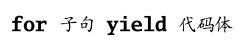
yield关键字必须出现在整个代码体之前。哪怕代码体是由花括号包起来的，也要将yield放在花括号之前，而不是在代码块最后一个表达式前面。避免像这样使用yield：

In [ ]:
val filesHere = (new java.io.File(".")).listFiles
for (file <- filesHere if file.getName.endsWith(".ipynb")){
    yield file //语法错误
}

举例来说，示例7.10里的f o r表达式首先将包含当前目录所有文件的名为filesHere的Array[File]转换成一个只包含.scala文件的数组。对每一个文件，再用fileLines方法（参见示例7.8）的结果生成一个Iterator[String]。Iterator提供的next和hasNext方法，可以用来遍历集合中的元素。这个初始的迭代器又被转换成另一个Iterator[String]，这一次只包含那些包含子串＂for＂的被去边的字符串。最后，对这些字符串再交出其长度的整数。这个for表达式的结果是包含这些长度整数的Array[Int]。

In [ ]:
def fileLines(file: java.io.File) = 
    scala.io.Source.fromFile(file).getLines().toList

def grep(pattern: String) =
    for{
        file <- filesHere
        if file.getName.endsWith(".log")
        line <- fileLines(file)
        trimmed = line.trim
        if trimmed.matches(pattern)
    }println(file + ": " + trimmed)


val filesHere = (new java.io.File(".")).listFiles

val forLineLengths =
    for{
        file <- filesHere
        if file.getName.endsWith(".log")
        line <- fileLines(file)
        trimmed = line.trim
        if trimmed.matches(".*error.*")
    } yield trimmed.length


grep(".*error.*")

示例7.10 用for表达式将Array[File]转换成Array[Int]

至此，你已经看到了Scala的for表达式的所有主要功能特性，不过我们讲得比较快，在第23章给出了对for表达式更完整的讲解。

## 7.4 用try表达式实现异常处理
Scala的异常处理跟其他语言类似。方法除了正常地返回某个值外，也可以通过抛出异常终止执行。方法的调用方要么捕获并处理这个异常，要么自我终止，让异常传播到更上层调用方。异常通过这种方式传播，逐个展开调用栈，直到某个方法处理该异常或者再没有更多方法了为止。

**抛出异常**
在Scala中抛出异常跟Java看上去一样。你需要创建一个异常对象然后用throw关键字将它抛出：

In [ ]:
throw new IllegalArgumentException

虽然看上去有些自相矛盾，在Scala中throw是一个有结果类型的表达式。如下是一个带有结果类型的示例：

In [ ]:
val n = 3

val half = 
    if(n % 2 == 0)
        n / 2
    else
        throw new RuntimeException("n must be even")

在这段代码中，如果n是偶数，half将被初始化成n的一半。如果n不是偶数，那么在half被初始化之前，就会有异常被抛出。因此，我们可以安全地将抛出异常当作任何类型的值来对待。任何想要使用throw给出的这个返回值的上下文都没有机会真正使用它，也就不必担心有其他问题。

技术上讲，抛出异常这个表达式的类型是Nothing。哪怕表达式从不实际被求值，也可以用throw。这个技术细节听上去有点奇怪，不过在前一例这样的场景下，还是很常见也很有用的。if的一个分支计算出某个值，而另一个分支抛出异常并计算出Nothing。整个if表达式的类型就是那个计算出某个值的分支的类型。我们将在11.3节对Nothing做进一步的介绍。

**捕获异常**  
可以用示例7.11中的语法来捕获异常。catch子句的语法之所以是这样，为的是与Scala的一个重要组成部分，模式匹配（pattern matching），保持一致。我们将在本章简单介绍并在第15章详细介绍模式匹配这个强大的功能。

In [ ]:
import java.io.FileReader
import java.io.FileNotFoundException
import java.io.IOException
try {
    val f = new FileReader("input.txt")
} catch {
    case ex: FileNotFoundException => println("File not found")
    case ex: IOException => println("other problem")
}

这个try-catch表达式跟其他带有异常处理的语言一样。首先代码体会被执行，如果抛出异常，则会依次尝试每个catch子句。在本例中，如果异常的类型是FileNotFoundException，第一个子句将被执行。如果异常类型是IOException，那么第二个子句将被执行。而如果异常既不是FileNotFoundException也不是IOException,try-catch将会终止，异常将向上继续传播。

**注意**  
你会注意到一个Scala跟Java的区别，Scala并不要求你捕获受检异常（checked exception）或在throws子句里声明。可以选择用@throws注解来声明一个throws子句，但这并不是必须的。关于@throws的详情，请参考31.2节。

**finally子句**  
可以将那些不论是否抛出异常都想执行的代码以表达式的形式包在finally子句里。例如，你可能想要确保某个打开的文件要被正确关闭，哪怕某个方法因为抛出了异常而退出。示例7.12给出了这样的例子：[5]

In [ ]:
import java.io.FileReader
//val file = new FileReader("input.txt")
try{
    val file = new FileReader("input.txt")
    println("abc")
} catch {
    case ex: FileNotFoundException => println("File not found")
    case ex: IOException => println("other problem")
} finally {
    //file.close() //close file
    println("close file")
}

**注意**  
示例7.12展示了确保非内存资源被正确关闭的惯用做法，这些资源可以是文件、套接字、数据库连接等。首先获取资源，然后在try代码块中使用资源，最后在finally代码块中关闭资源。这个习惯Scala和Java是一致的。Scala提供了另一种技巧，贷出模式（loan pattern）来更精简地达到相同的目的。我们将在9.4节详细介绍贷出模式。

**交出值**  
跟Scala的大多数其他控制结构一样，try-catch-finally最终返回一个值。例如，示例7.13展示了如何做到解析URL，但当URL格式有问题时返回一个默认的值。如果没有异常抛出，整个表达式的结果就是try子句的结果；如果有异常抛出并且被捕获时，整个表达式的结果就是对应的catch子句的结果；而如果有异常抛出但没有被捕获，整个表达式就没有结果。如果有finally子句，该子句计算出来的值会被丢弃。finally子句一般都是执行清理工作，比如关闭文件。通常来说，它们不应该改变主代码体或catch子句中计算出来的值。

如果你熟悉Java，需要注意的是Scala的行为跟Java不同，仅仅是因为Java的try-finally并不返回某个值。跟Java一样，当finally子句包含一个显式的返回语句，或者抛出某个异常，那么这个返回值或异常将会“改写”（overrule）任何在之前的try代码块或某个catch子句中产生的值。例如，在下面这个刻意做成这样的函数定义中：

In [ ]:
def f(): Int = try return 1 finally return 2
f()

In [ ]:
import java.net.URL
import java.net.MalformedURLException
def urlFor(path: String) = 
    try {
        new URL(path)
    } catch {
        case e: MalformedURLException => new URL("http://www.scala-lang.org")
    }

urlFor("http://www.baidu.com")

调用f（）将得到2。相反，如果是如下代码：

In [ ]:
def g(): Int = try 1 finally 2
g()

调用g（）将得到1。这两个函数的行为都很可能让多数程序员感到意外。因此，最好避免在finally子句中返回值，最好将finally子句用来确保某些副作用发生，比如关闭一个打开的文件。

## 7.5 match表达式  
Scala的match表达式让你从若干可选项（alternative）中选择，就像其他语言中的switch语句那样。一般而言，match表达式让你用任意的模式（pattern）来选择（参见第15章）。抛开一般的形式不谈，目前我们只需要知道可以用match来从多个可选项中进行选择即可。

我们来看一个例子，示例7.14中的脚本从参数列表读取食物名称并打印出这个食物的搭配食材。这个match表达式首先检查firstArg，这个变量对应的是参数列表中的首个参数。如果是字符串＂salt＂，打印＂pepper＂；如果是字符串＂chips＂，打印＂salsa＂；以此类推。缺省的样例以下画线（_）表示，这个通配符在Scala中经常被用来表示某个完全不知道的值。


In [ ]:
val args = Array("salt")
val firstArg = if(args.length > 0) args(0) else ""
firstArg match {
    case "salt" => println("papper")
    case "chips" => println("salsa")
    case "eggs" => println("bacon")
    case _ => println("huh?")
}

Scala的match表达式跟Java的switch相比，有一些重要的区别。其中一个区别是任何常量、字符串等都可以用作样例，而不仅限于Java的case语句支持的整型、枚举和字符串常量。在示例7.14中，可选项是字符串。另一个区别是在每个可选项的最后并没有break。在Scala中break是隐含的，并不会出现某个可选项执行完继续执行下一个可选项的情况。这通常是我们预期的（不直通到下一个可选项），代码因此变得更短，也避免了一类代码错误的源头，因为程序员不再会不小心直通到下一个可选项了。

不过Scala的match表达式跟Java的switch相比最显著的不同，在于match表达式会返回值。在前一例中，match表达式的每个可选项都打印出一个值。如果将打印语句换成交出某个值，相应的代码依然能工作，如示例7.15所示。从这个match表达式得到的结果被保存在变量friend中。这样的代码不仅更短（至少字数更少了），它还将两件不同的事情解耦了：首先选择食物，然后再将食物打印出来。

In [ ]:
val args = Array("salt")
val firstArg = if(args.length > 0) args(0) else ""
val friend =
firstArg match {
    case "salt" => "papper"
    case "chips" => "salsa"
    case "eggs" => "bacon"
    case _ => "huh?"
}
println(friend)

## 7.6 没有break和continue的日子
你可能已经注意到了，我们并没有提到break或continue。Scala去掉了这两个命令，因为它们跟接下来一章会讲到的函数字面量不搭。在while循环中，continue的含义是清楚的，不过在函数字面量当中应该是什么含义才合理呢？尽管Scala同时支持指令式和函数式风格的编程，在这个具体的问题上，它更倾向于函数式编程，以换取语言的简单。不过别担心，就算没有了break和continue，一样有很多其他方式来编程。而且，如果你用好了函数字面量，这里提到的其他方式通常比原来的代码更短。

最简单的方式是用if换掉每个continue，用布尔值换掉每个break。布尔值表示包含它的while循环是否继续。例如，假定你要检索参数列表，找一个以“.scala”结尾但不以连字符（hyphen）开头的字符串。用Java的话你可能会这样写（如果你喜欢while循环、break和continue）：

In [ ]:
int i = 0;//this is java can't run here
boolean foundIt = false;
while(i<args.length){
    if(args[i].startsWith("-")){
        i = i + 1;
        continue;
    }
    if(args[i].endWith(".scala")){
        foundIt = true;
        break;
    }
    i = i + 1
}

如果要将这段Java代码直接翻译成Scala，可以把先if再continue的写法改成用if将整个while循环体剩余的部分包起来。为了去掉break，通常会添加一个布尔值的变量，表示是否要继续循环，不过在本例中可以直接复用foundIt。通过上述两种技巧，代码看上去如示例7.16所示：

In [ ]:
val args = Array("salt")

var i = 0
var foundIt = false
while(i < args.length && !foundIt){
    if(!args(i).startsWith("-")){
        if(args(i).endsWith(".scala"))
            foundIt = true
    }
    i = i + 1
}

示例7.16中的Scala代码跟原本的Java代码很相似。所有基础的组件都在，顺序也相同。有两个可被重新赋值的变量和一个while循环，而在循环中有一个对i是否小于args.length的检查、一个对＂-＂的检查，和一个对＂.scala＂的检查。

如果你想去掉示例7.16中的v a r，一种做法是将循环重写为递归的函数。比方说，可以定义一个searchFrom函数，接收一个整数作为输入，从那里开始向前检索，然后返回找到的入参下标。通过这个技巧，代码看上去如示例7.17所示：

In [ ]:
def searchFrom(i: Int): Int =
    if(i >= args.length) -1
    else if(args(i).startsWith("-")) searchFrom(i + 1)
    else if(args(i).endsWith(".scala")) i
    else searchFrom(i + 1)

val i = searchFrom(0)

示例7.17的这个版本采用了对人来说有意义的函数名，并且使用递归替换掉了循环。每一个continue都替换成一次以i + 1作为入参的递归调用，从效果上讲跳到了下一个整数值。一旦习惯了递归，不少人都会认为这种风格的编程方式更易于理解。

**注意**  
Scala编译器实际上并不会对示例7.17中的代码生成递归的函数。由于所有的递归调用都发生在函数尾部（tail-call position），编译器会生成与while循环类似的代码。每一次递归都会被实现成跳回到函数开始的位置。8.9节将会对尾递归优化做更详细的讨论。

如果经过这些讨论你仍觉得需要使用break,Scala标准类库也提供了帮助。**scala.util.control包的Break类给出了一个break方法，可以被用来退出包含它的用breakable标记的代码块**。如下是使用这个由类库提供的break方法的示例：

In [ ]:
import scala.util.control.Breaks._
import java.io._
val in = new BufferedReader(new InputStreamReader(System.in))
breakable{
    while(true){
        println("? ")
        if(in.readLine() == "") break
    }
}

这段代码将不断反复地从标准输入读取非空的文本行。而一旦用户输入空行，控制流就会从外层的breakable代码块退出，while循环也随之退出。

Break类实现break的方式是抛出一个异常，然后由外围的对breakable方法的应用所捕获。因此，对break的调用并不需要跟对breakable的调用放在同一个方法内。

## 7.7 变量作用域
现在你已经看过Scala内建的控制结构，我们将在本节用它们来解释Scala的变量作用域。

**Java程序员的快速通道**  
如果你是Java程序员，你会发现Scala的作用域规则几乎跟Java完全一样。Java和Scala的一个区别是Scala允许你在嵌套的作用域内定义同名的变量。所以如果你是Java程序员，最好至少是快速地扫一遍本节的内容。

Scala程序的变量在声明时附带了一个规定在哪里能使用这个名称的作用域（scope）。关于作用域最常见的例子是花括号一般都会引入一个新的作用域，因此任何在花括号中定义的元素都会在右花括号之后离开作用域。[6]我们可以来看看示例7.18中的函数。


In [ ]:
def printMultiTable() = {

  var i = 1
  // only i in scope here

  while (i <= 10) {

    var j = 1
    // both i and j in scope here

    while (j <= 10) {

      val prod = (i * j).toString
      // i, j, and prod in scope here

      var k = prod.length
      // i, j, prod, and k in scope here

      while (k < 4) {
        print(" ")
        k += 1
      }

      print(prod)
      j += 1
    }

    // i and j still in scope; prod and k out of scope

    println()
    i += 1
  }

  // i still in scope; j, prod, and k out of scope
}

printMultiTable()

示例中7.18中的printMultiTable将打印出乘法表。[7]函数的第一个语句引入了名为i的变量并初始化成整数1，然后你就可以在函数的余下部分使用i这个名称。
printMultiTable函数的下一条语句是while循环：
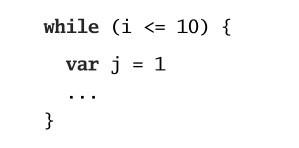
这里能用i，因为它仍在作用域内。while循环中的第一条语句又引入了另一个名为j的变量，还是初始化成整数1。由于变量j是在while循环的花括号中定义的，只能在while循环当中使用它。如果你在while循环的右花括号之后（即那行提示你j、prod和k已超出作用域的注释之后）还尝试对j做任何操作，你的程序将无法编译。

本例中定义的所有变量（i、j、prod、k）都是局部变量。这些变量只在定义它们的函数内“局部”有效。函数每次被调用，都会使用全新的局部变量。
变量一旦定义好，就不能在相同的作用域内定义相同名字的新变量。举例来说，下面这段有两个名为a的变量的脚本是无法通过编译的：

In [ ]:
val a = 1
val a = 2
println(a)

不过，可以在一个内嵌的作用域内定义一个跟外部作用域中相同名称的变量。比如下面的脚本可以正常编译和运行：

In [ ]:
val a = 1;
{
    val a = 2 //compilation pass
    println(a)
}
println(a)

这段脚本执行时，会先打印2然后打印1，这是因为在花括号中定义的a是不同的变量，这个变量只在右花括号结束之前处于作用域内。[8]需要注意的一个Scala跟Java的区别是，Java不允许你在内嵌的作用域使用一个跟外部作用域内相同名称的变量。在Scala程序中，内嵌作用域中的变量会遮挡（shadow）外部作用域中相同名称的变量，因为外部作用域的同名变量在内嵌作用域内将不可见。

你可能已经注意到如下在解释器中类似遮挡的行为：

In [ ]:
val a = 1

In [ ]:
val a = 2
println(a)

在解释器中，可以随心地使用变量名。其他的先不谈，单这一点，让你能够在不小心定义错了某个变量之后改变主意。你之所以能这样做，是因为从概念上讲，解释器会对你录入的每一条语句创建一个新的作用域。因此，可以像这样来看待被解释后的代码：

In [ ]:
val a = 1;
{
    val a = 2; //compilation pass
    {
        println(a)
    }
}

这段代码能够作为Scala脚本正常编译和运行，并且跟键入到解释器中的代码一样，会打印出2。请记住这样的代码对于阅读者来说会很困惑，因为变量在内嵌的作用域内是不同的含义。通常更好的做法是选一个新的有意义的变量名，而不是（用同样的名称）遮挡某个外部作用域的变量。

## 7.8 对指令式代码进行重构
为了帮助你对函数式编程有更深的领悟，本节将对示例7.18的指令式风格打印乘法表的做法进行重构。我们的函数式版本如示例7.19所示。

In [ ]:
def makeRowSeq(row: Int) = 
    for(col <- 1 to 10) yield {
        val prod = (row * col).toString
        val padding = " " * (4 - prod.length)
        padding + prod
    }
//以字符串形式返回一行
def makeRow(row: Int) = makeRowSeq(row).mkString
def multiTable() = {
    val tableSeq =
        for(row <- 1 to 10) yield makeRow(row)
    tableSeq.mkString("\n")
}

println(multiTable())

示例中7.18的指令式风格体现在两个方面。首先，调用printMultiTable有一个副作用：将乘法表打印到标准输出。在示例7.19中，我们对函数进行了重构，以字符串的形式返回乘法表。由于新的函数不再执行打印，我们将它重命名为multiTable。就像我们先前提到的，没有副作用的函数的优点之一，是它们更容易进行单元测试。要测试printMultiTable，需要以某种方式重新定义print和println，这样你才能检查输出是否正确。而测试multiTable则更容易，只要检查它的字符串返回值即可。

其次，printMultiTable用到了while循环和var，这也是指令式风格的体现。相反地，函数multiTable用的是val、for表达式、助手函数（helper function）和对mkString的调用。

我们重构出两个助手函数makeRow和makeRowSeq，让代码更易读。函数makeRowSeq使用for表达式，其生成器遍历列号1到10。这个for表达式的执行体计算行号和列号的乘积，确定乘积需要的对其补位，并交出将补位符和乘积拼接在一起的字符串结果。for表达式的结果将会是一个包含以这些交出的字符串作为元素的序列（scala.Seq的某个子类）。而另一个助手函数makeRow只是简单地对makeRowSeq调用mkString。mkString会把序列中的字符串拼接起来，返回整个字符串。

multiTable方法首先用一个for表达式的结果初始化tableSeq。这个for表达式的生成器会遍历1到10，对每个数调用makeRow得到对应行的字符串；这个字符串被交出，因此这个for表达式的结果将会是包含了一行对应的字符串的序列。接下来就是将这个字符串序列转换成单个字符串了，调用mkString可以做到这一点。由于我们传入了＂\n＂，所以在每两个字符串中间都插入了一个换行符。如果将multiTable返回的字符串传给println，将会看到跟调用printMultiTable相同的输出。
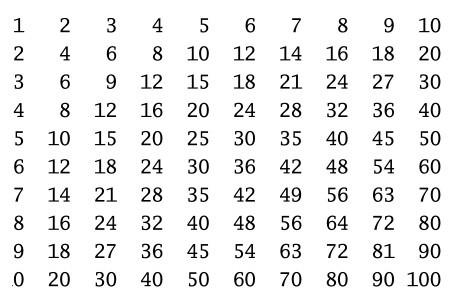

## 7.9 结语
Scala内建的控制结构很小，但能解决问题。它们跟指令式的控制结构类似，但由于有返回值，它们也支持更函数式的编程风格。同样重要的是，它们很用心地略去了一些东西，让Scala最强大的功能特性之一，函数字面量，得以发挥威力。函数字面量将在下一章详细介绍。

________________________________________
[1].原书这里表述有误，有没有等号不是关键，结果类型是否为Unit才是关键。当结果类型为Unit时，写不写等号都可以；结果类型不为Unit时，则必须写等号。——译者注  
[2].示例7.4中的gcd函数使用了跟示例6.3中类似命名的，用来帮Rational计算最大公约数的函数相同的算法。主要的区别在于示例7.4的gcd针对的是Long类型的参数而不是Int。  
[3].意思是寻求不需要使用while的方案。——译者注  
[4].准确地说，在for表达式的<-符号右侧的表达式可以是任何拥有某些特定的带有正确签名的方法的类型。第23章将会详细介绍Scala编译器对for表达式的处理机制。  
[5].虽然你必须用括号将catch子句中的case语句包起来，try和finally并没有这个要求，当只有一个表达式时，花括号并不是必需的，比如：try t（） catch { case e: Exception => ... }finally f（）。  
[6].这个规则有几个例外，因为在Scala中有时候可以用花括号来替代圆括号。举个例子来说就是7.3节的for表达式可选项语法。  
[7].示例7.18中的printMultiTable函数是以指令式风格编写的，我们将在下一节重构成函数式的风格。  
[8].对了，这里的首个a定义后的分号是必需的，因为Scala的分号推断不会帮我们在这个位置自动添加分号。